In [4]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [6]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[ 4.53629768],
       [ 2.98568421]])

In [9]:
X_new = np.array([[0],[2]])

In [11]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [24]:
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[  4.53629768]
 [ 10.5076661 ]]


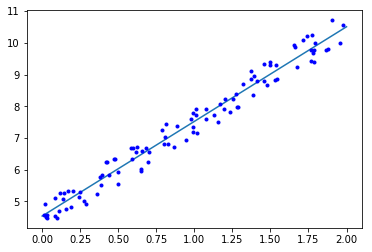

In [26]:
plt.plot(X_new,y_predict)
plt.plot(X,y,'b.')

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)

[ 4.53629768] [[ 2.98568421]]


In [29]:
lin_reg.predict(X_new)

array([[  4.53629768],
       [ 10.5076661 ]])

# Gradient descent

In [32]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [35]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [36]:
theta

array([[ 4.53629768],
       [ 2.98568421]])

array([[ 1.        ,  0.7978175 ],
       [ 1.        ,  1.65171299]])

# stochastic gradient descent

In [47]:
n_epocs = 50
t0,t1 = 5, 50 # learning rate schedule hyperparamenters 

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epocs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m +i )
        theta = theta - eta * gradients

In [48]:
theta

array([[ 4.53534381],
       [ 2.9907412 ]])

# Polynomial Regression

In [6]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2+ X + 2 + np.random.randn(m,1)

In [10]:
X[0]

array([ 0.13592962])

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures()
X_poly = poly_features.fit_transform(X)


In [15]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
% matplotlib inline

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 2.03687975]), array([[ 0.        ,  0.94570225,  0.455409  ]]))

# Learning Curves

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=2,label='val')

In [17]:
lin_reg = LinearRegression()

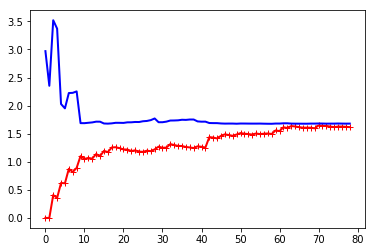

In [29]:
plot_learning_curves(lin_reg,X,y)

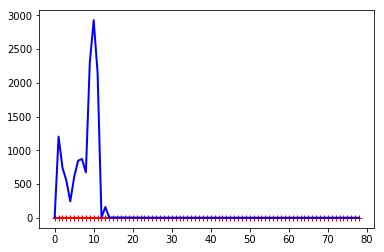

In [32]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                                 ('lin_reg',LinearRegression())))
plot_learning_curves(polynomial_regression,X,y)

# Ridge regression

In [37]:
from sklearn.linear_model import Ridge,SGDRegressor
ridge_reg = Ridge(alpha=1,solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 4.85957768]])

In [38]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 4.22637833])

# Lasso

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 4.81969085])

In [41]:
X_train_poly_scaled,X_val,y_train,y_val = train_test_split(X_poly,y,test_size = 0.2)

# Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 4.81899585])

In [42]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)
minimum_val_error = float("inf")
best_epoc = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_predict,y_val)
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoc= epoch
        best_model = clone(sgd_reg)

C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed

C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will 

C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will 

C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will 

C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Prasanna.Gnanaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will 

In [43]:
best_epoc

949

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [2]:
X = iris['data'][:,3:] # petal width

In [5]:
y = (iris['target']==2).astype(np.int)

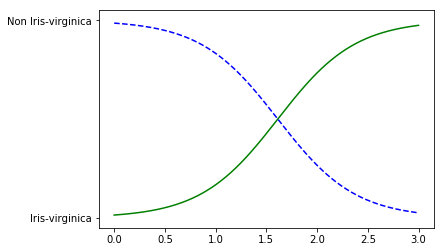

In [8]:
from sklearn.linear_model import LogisticRegression
l_reg = LogisticRegression()
l_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = l_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-','Iris-virginica')
plt.plot(X_new,y_proba[:,0],'b--','Non Iris-virginica')
